In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from clusterSOM import clusterSOM
from utility_functions import *
from matplotlib import rc

In [2]:
rc('text', usetex=True)
fontsize = 27
font = {'family' : 'serif',
        'serif' : ' Computer Modern Roman', 
       'size' : fontsize}
rc('font', **font)
mpl.rcParams.update({'font.size': fontsize,
                           'ytick.labelsize': fontsize, 
                           'xtick.labelsize': fontsize, 
                           'axes.labelsize': fontsize, 
                           'axes.titlesize': fontsize})

In [6]:
savePath = 'Results/' 
dataPath = 'data/'

In [4]:
fig_x_quad = 9
fig_y_quad = 8
fig_x_heat = 10
fig_y_heat = 6

# Figure 1: raw data of selected features with field lines

In [7]:
with open(dataPath + 'data_cyc2000/raw_data.p', 'rb') as f:
    raw_data = pickle.load(f)

In [8]:
Jz = np.reshape(raw_data[:,10], (2128, 2128))
pxxe = np.reshape(raw_data[:,14], (2128, 2128))
Bz = np.reshape(raw_data[:,2], (2128, 2128))
pxze = np.reshape(raw_data[:,16], (2128, 2128))

In [9]:
with open(dataPath + 'data_cyc2000/fieldlines_f.p', 'rb') as f:
    field_f = pickle.load(f)

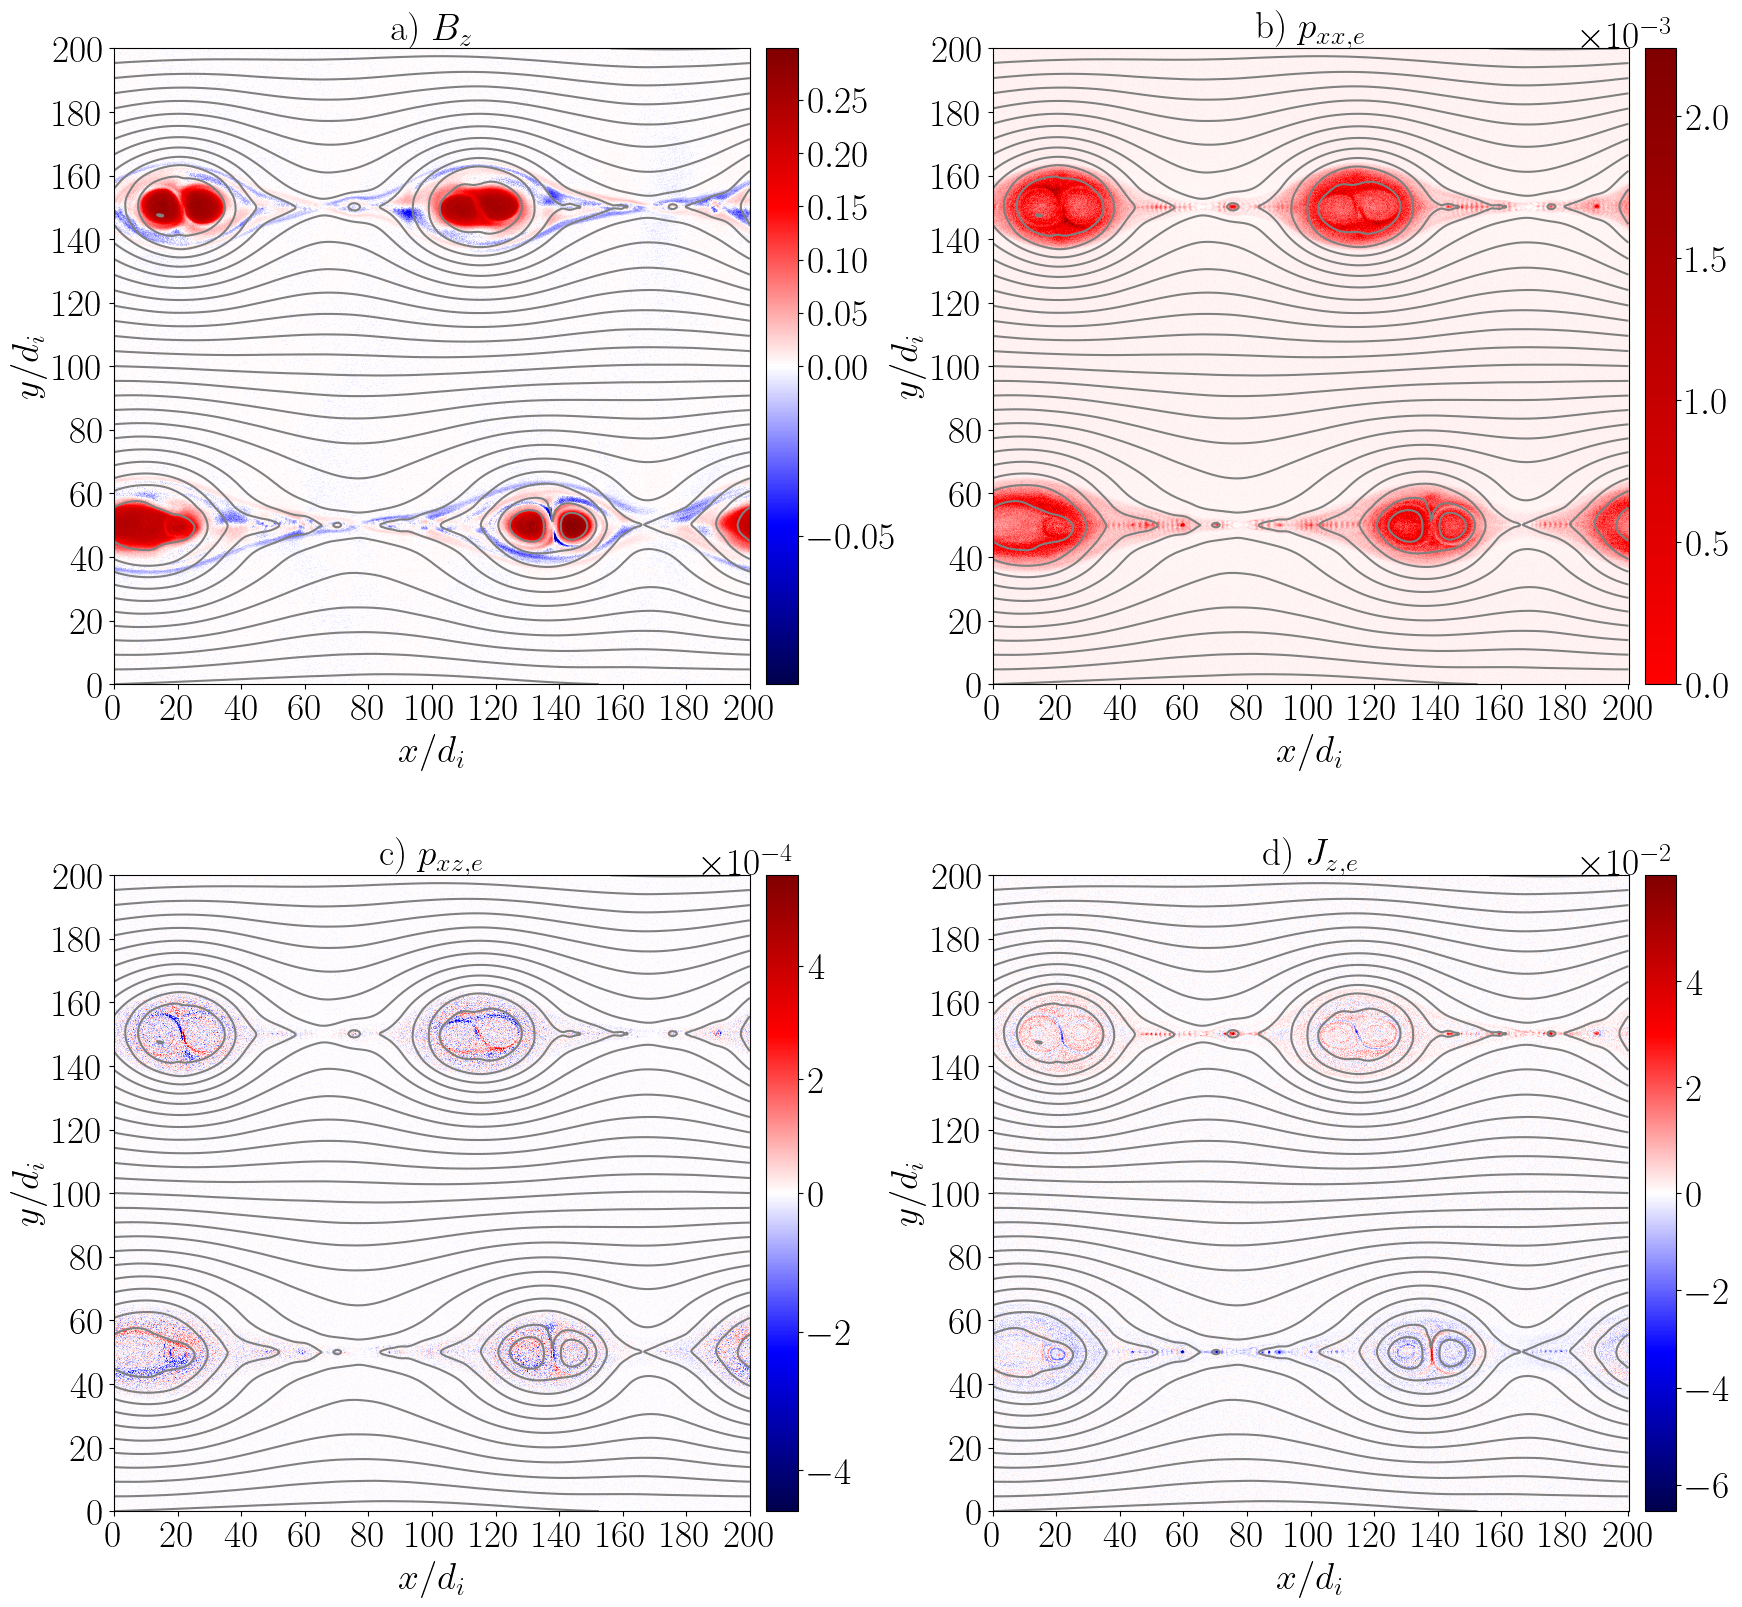

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(2*fig_x_quad,2*fig_y_quad))
axs = axs.flatten()
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.3)

vmin, vmax, vcenter = get_normvals(Jz)
#heatmap2d_fieldlines
ax4 = heatmap2d(axs[3], Jz, 'd)  $J_{z,e}$',colmap = 'seismic', filename = 'Jzelec_upper', dir = 'Results', norm = mpl.colors.TwoSlopeNorm(vmin = vmin, vmax = vmax, vcenter = vcenter),power = True, f=field_f)

vmin, vmax, vcenter = get_normvals(pxxe)
ax2 = heatmap2d(axs[1], pxxe, 'b)  $p_{xx,e}$',colmap = 'seismic', filename = 'Jzelec_upper', dir = 'Results', norm = mpl.colors.TwoSlopeNorm(vmin=vmin, vmax=vmax, vcenter=vcenter), power = True, f=field_f)

vmin, vmax, vcenter = get_normvals(Bz)
ax1 = heatmap2d(axs[0], Bz, 'a)  $B_{z}$',colmap = 'seismic', filename = 'Jzelec_upper', dir = 'Results', norm = mpl.colors.TwoSlopeNorm(vmin=vmin, vmax=vmax, vcenter=vcenter), f=field_f)

vmin, vmax, vcenter = get_normvals(pxze)
ax3 = heatmap2d(axs[2], pxze, 'c)  $p_{xz,e}$',colmap = 'seismic', filename = 'Jzelec_upper', dir = 'Results', norm = mpl.colors.TwoSlopeNorm(vmin=vmin, vmax=vmax, vcenter=vcenter), power = True, f=field_f)

plt.savefig(savePath + 'raw_data_fieldlines.pdf', bbox_inches = 'tight')

# Figure 2: Violin Plots of data scaled with different scalers

In [11]:
with open(dataPath + 'data_cyc2000/minmax_scaled_data.p', 'rb') as f:
    minmax_data = pickle.load(f)
with open(dataPath + 'data_cyc2000/standard_scaled_data.p', 'rb') as f:
    standard_data = pickle.load(f)
with open(dataPath + 'data_cyc2000/robust_scaled_data.p', 'rb') as f:
    robust_data = pickle.load(f)

In [12]:
df = dict()
df['By_mm'] = minmax_data[:,1]
df['Jz_mm'] = minmax_data[:,10]
df['By_st'] = standard_data[:,1]
df['Jz_st'] = standard_data[:,10]
df['By_ro'] = robust_data[:,1]
df['Jz_ro'] = robust_data[:,10]
df = pd.DataFrame(df)

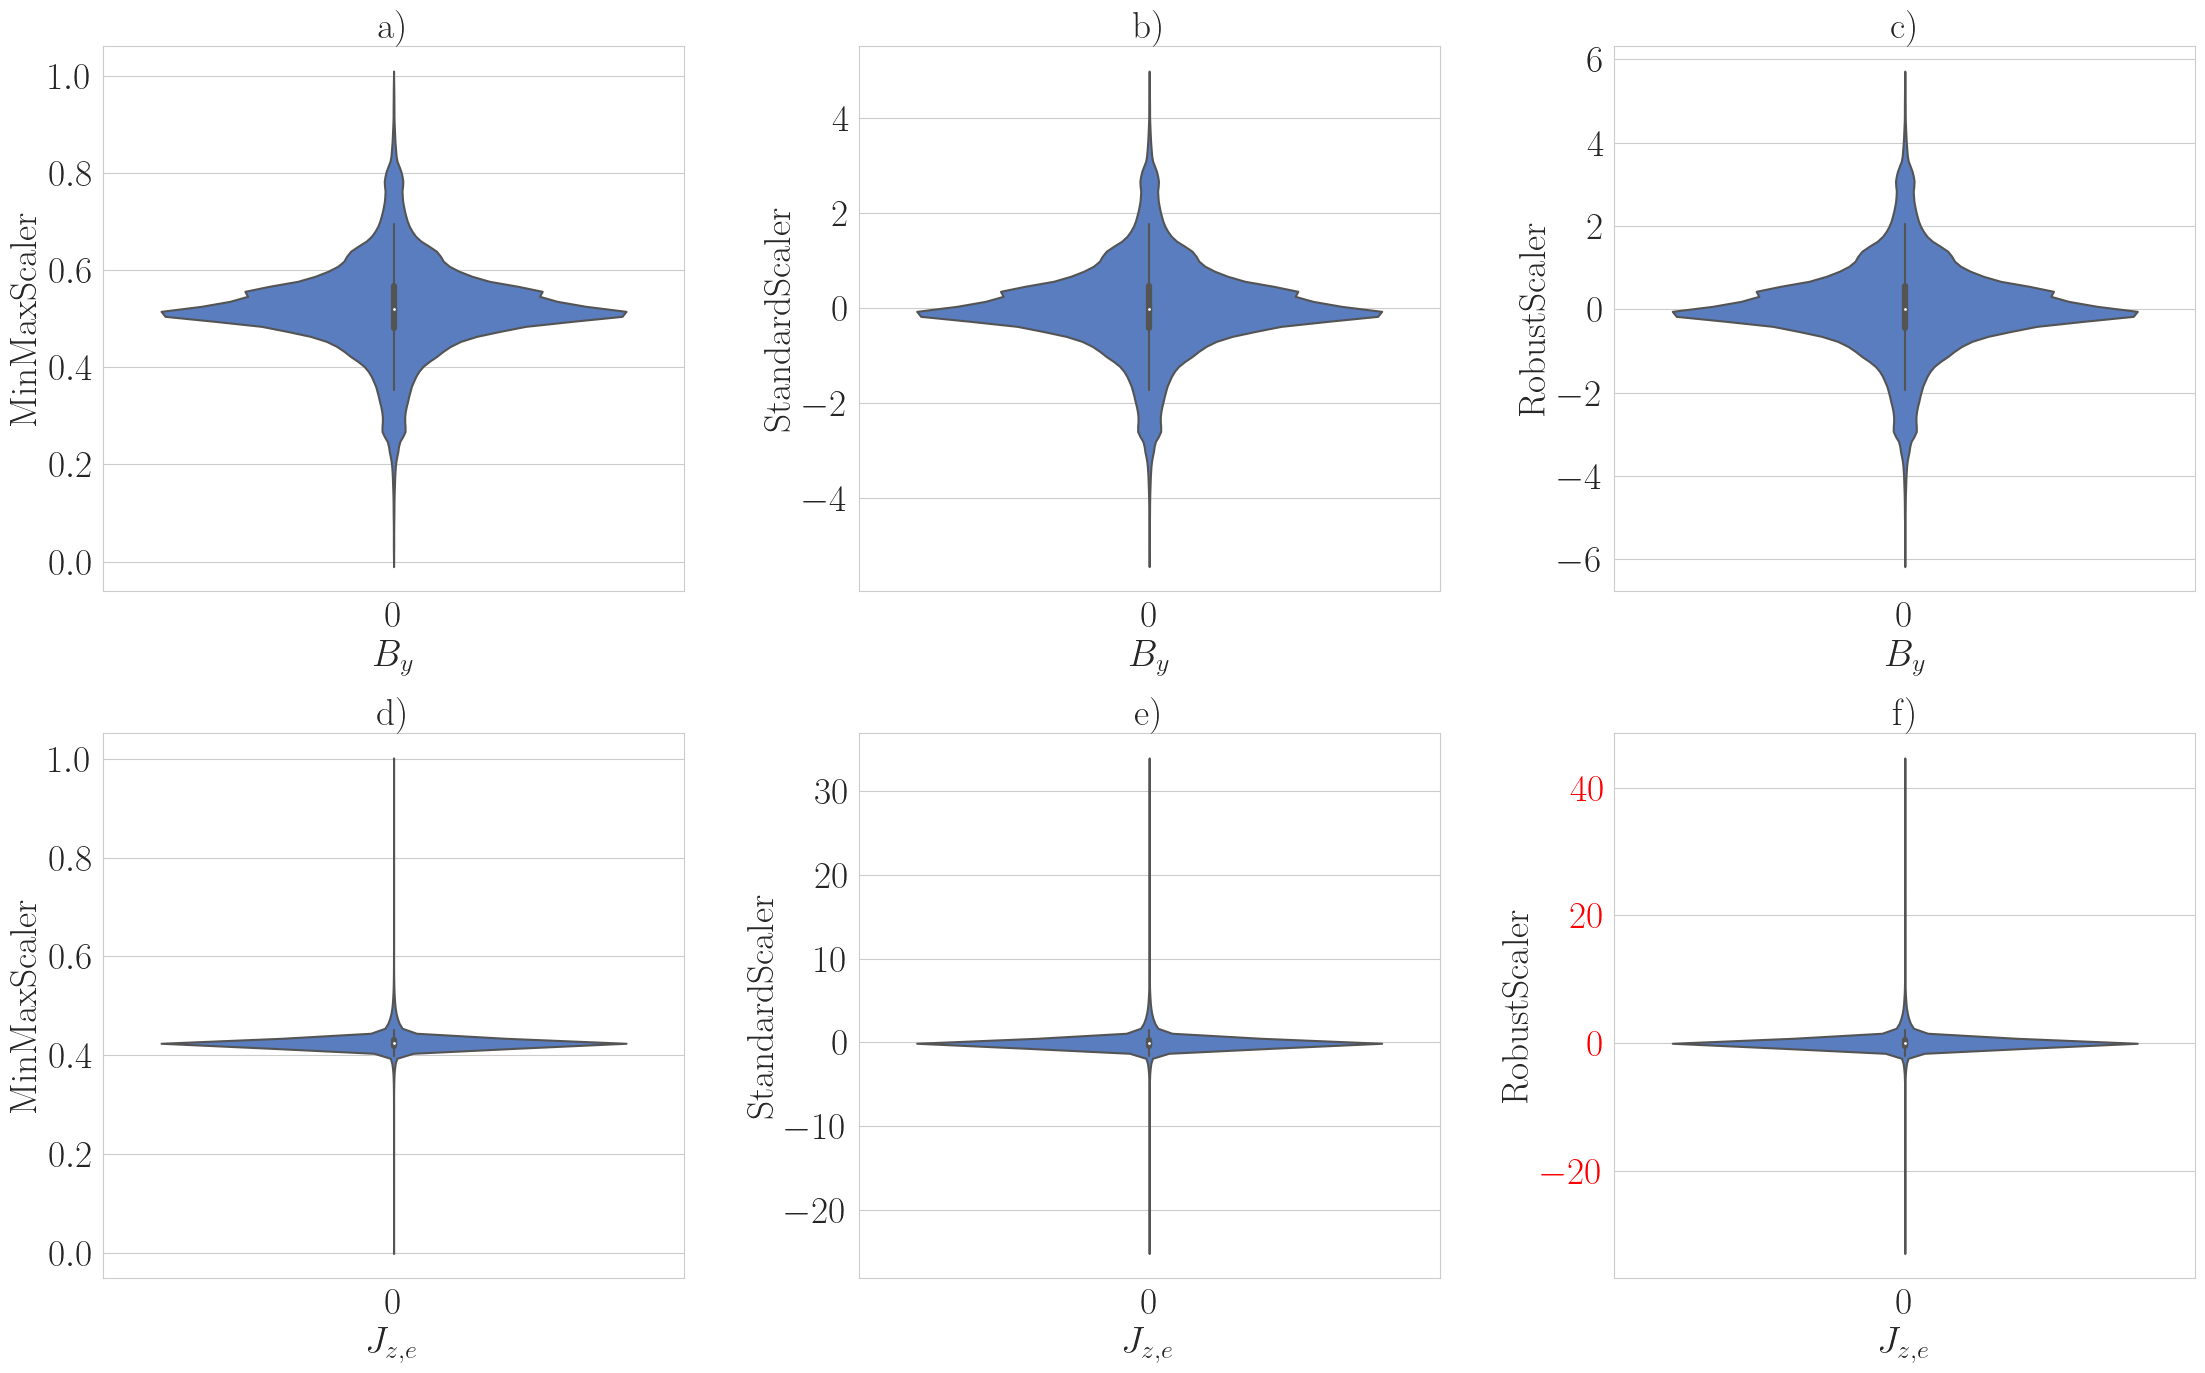

In [13]:
sns.set_style('whitegrid')
rc('font', **font)

f, axs = plt.subplots(2, 3, figsize=(3*fig_x_quad,2*fig_y_quad))


axs = axs.flatten()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.26)

ax = sns.violinplot(ax = axs[0], data = df['By_mm'], palette = "muted", scale = 'count', inner = 'box')
ax.set_ylabel('MinMaxScaler')
ax.set_xlabel('$B_y$')
ax.set_title('a)')

ax = sns.violinplot(ax = axs[1], data = df['By_st'], palette = "muted", scale = 'count', inner = 'box')
ax.set_xlabel('$B_y$')
ax.set_ylabel('StandardScaler')
ax.set_title('b)')


ax = sns.violinplot(ax = axs[2], data = df['By_ro'], palette = "muted", scale = 'count', inner = 'box')
ax.set_xlabel('$B_y$')
ax.set_ylabel('RobustScaler')
ax.set_title('c)')

ax = sns.violinplot(ax = axs[3], data = df['Jz_mm'], palette = "muted", scale = 'count', inner = 'box')
ax.set_xlabel('$J_{z,e}$')
ax.set_ylabel('MinMaxScaler')
ax.set_title('d)')

ax = sns.violinplot(ax = axs[4], data = df['Jz_st'], palette = "muted", scale = 'count', inner = 'box')
ax.set_xlabel('$J_{z,e}$')
ax.set_ylabel('StandardScaler')
ax.set_title('e)')


ax = sns.violinplot(ax = axs[5], data = df['Jz_ro'], palette = "muted", scale = 'count', inner = 'box')
ax.set_xlabel('$J_{z,e}$')
ax.set_ylabel('RobustScaler')
ax.set_title('f)')

for tick_label in ax.get_yticklabels():
    tick_label.set_color("red")
    
plt.savefig(savePath + 'violins_scaler.pdf', bbox_inches = 'tight')

In [14]:
mpl .rcParams.update({'font.size': fontsize,
                           'ytick.labelsize': fontsize, 
                           'xtick.labelsize': fontsize, 
                           'axes.labelsize': fontsize, 
                           'axes.titlesize': fontsize, 
                           'axes.grid': False})

# Figure 3: Classification results in SOM

In [15]:
minmax_dir = dataPath + 'minmax_n5_sigma20_eta05_82x82'
minmax_SOM = clusterSOM(minmax_dir)

standard_dir = dataPath + 'standard_n5_sigma20_eta05_82x82'
standard_SOM = clusterSOM(standard_dir)

robust_dir = dataPath + 'robust_n5_sigma20_eta05_71x93'
robust_SOM = clusterSOM(robust_dir)

D:\Uni\SOM\SOM Project\unsupervised-classification\clusterSOM.py:76: UserWarning: Trying to register the cmap 'cluster' which already exists.
  mpl.cm.register_cmap(name='cluster', cmap=cmap)


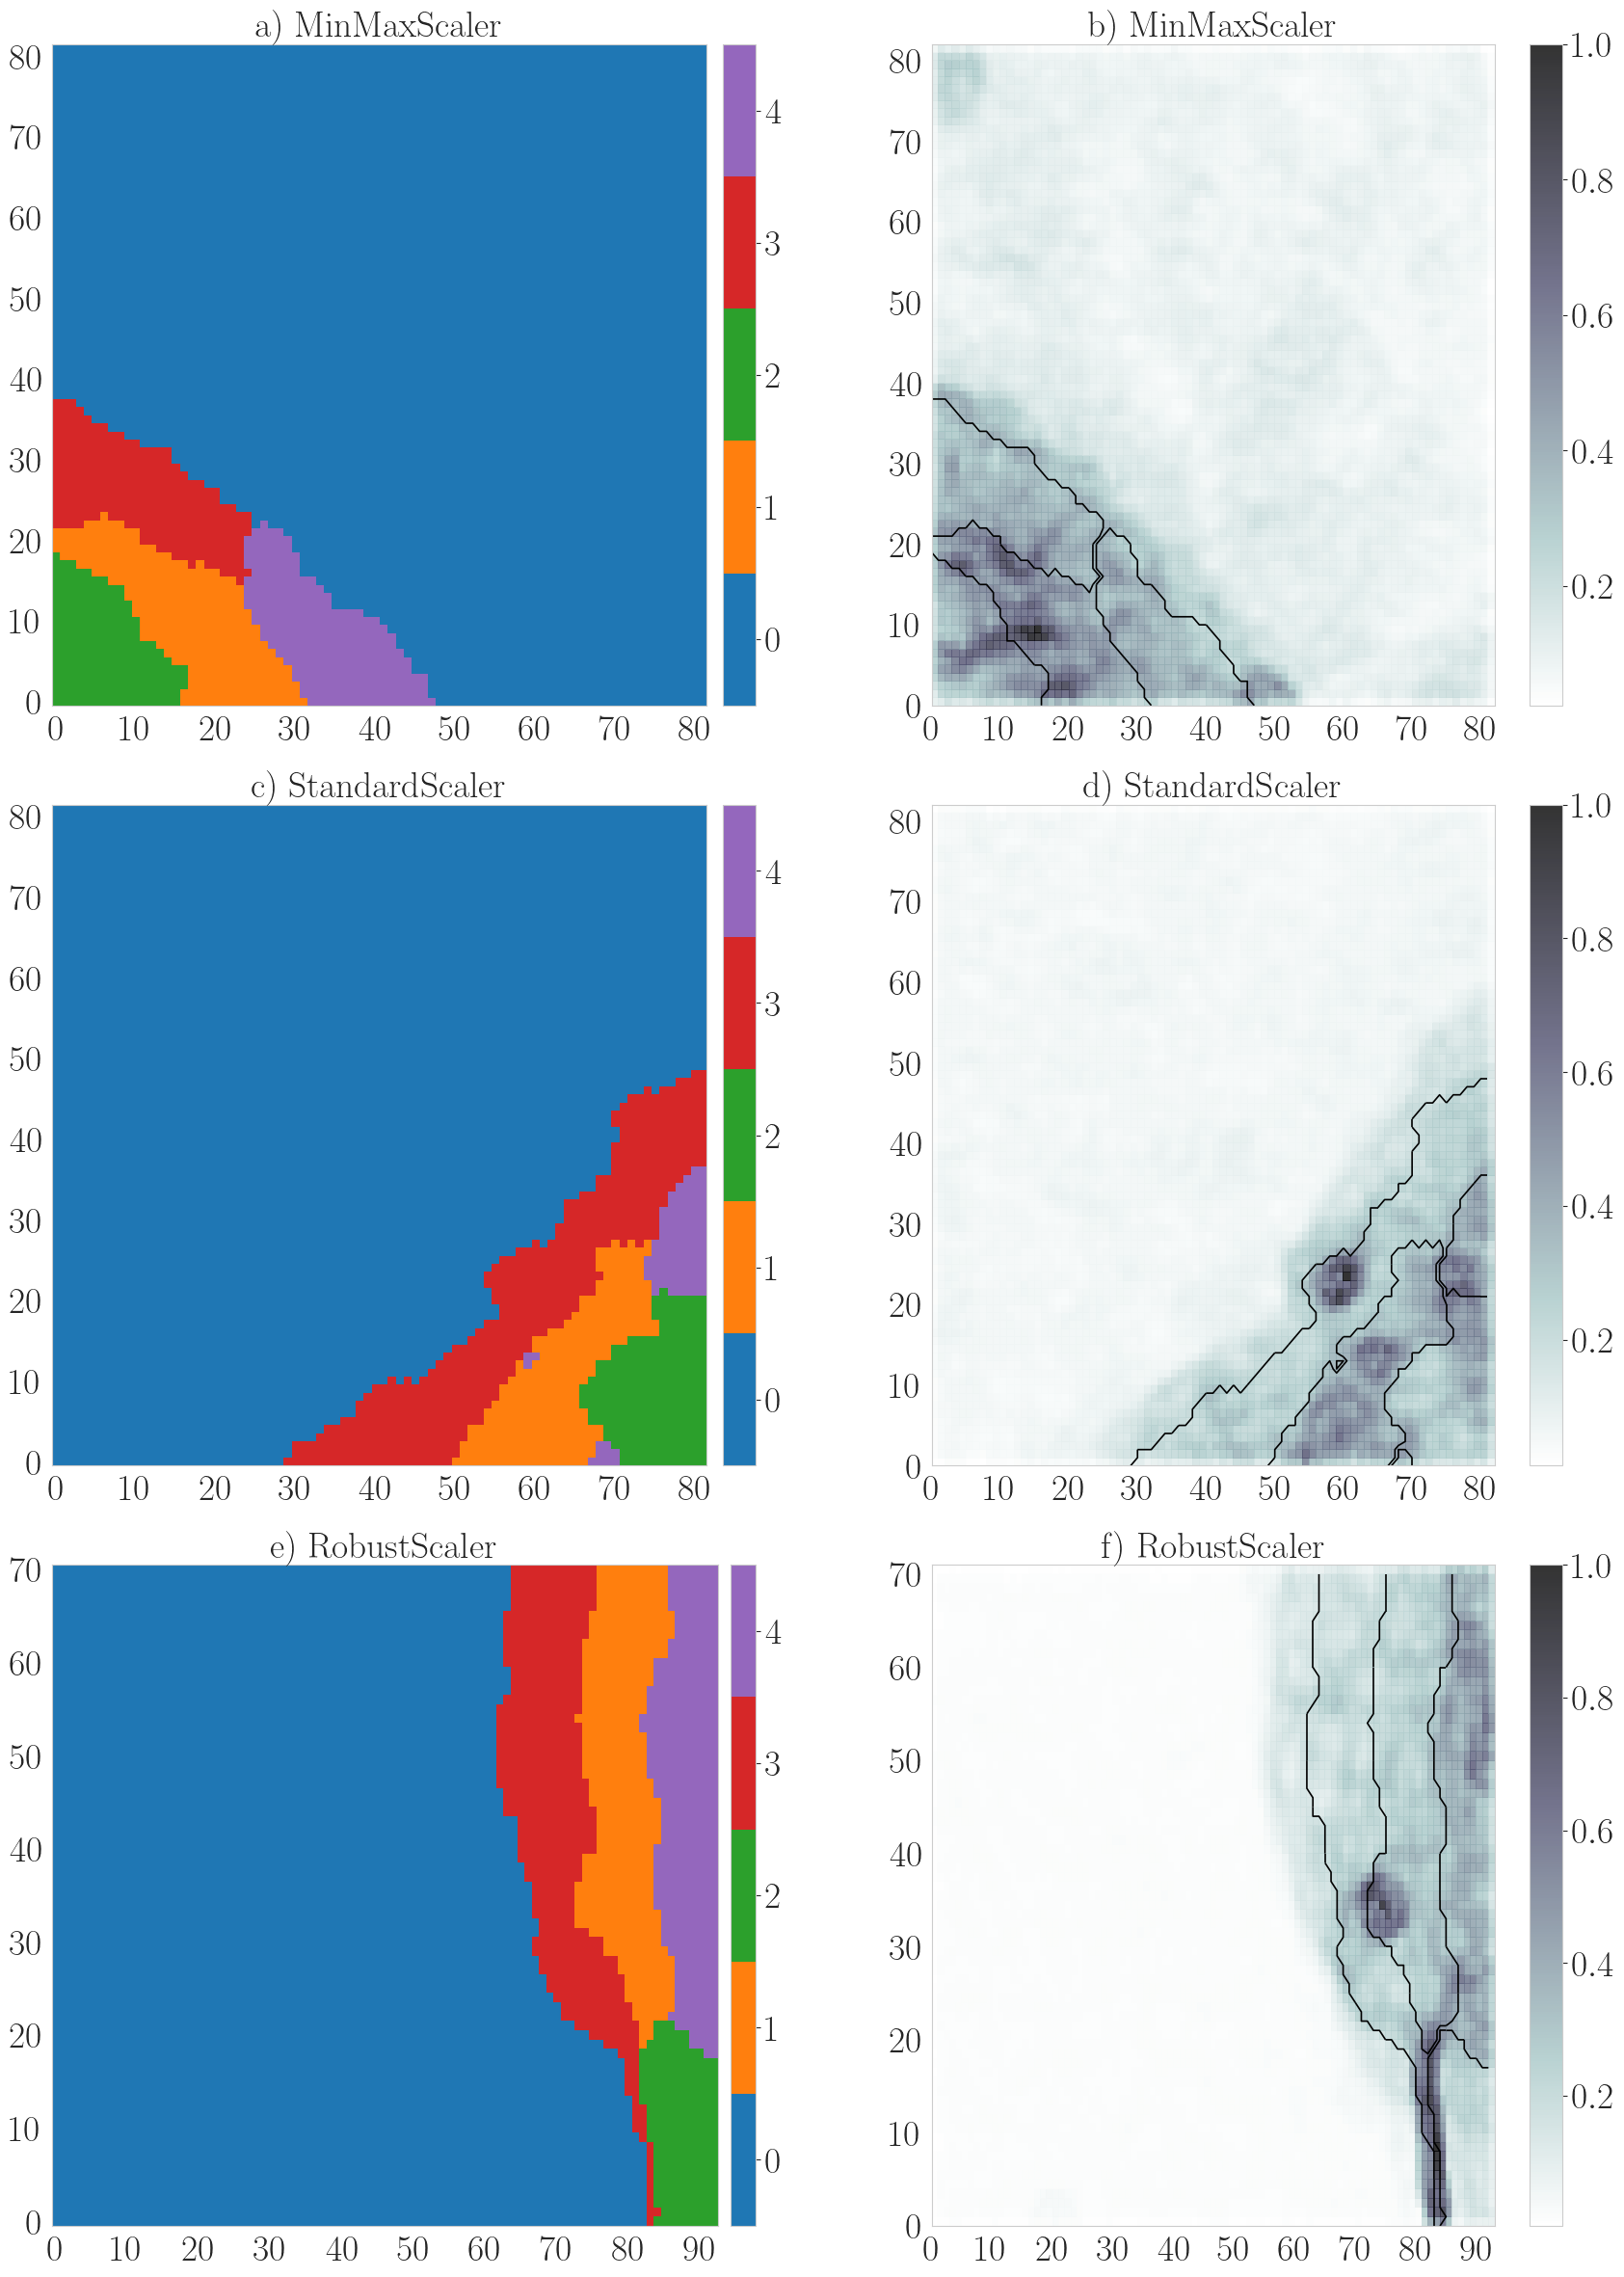

In [16]:
f, axs = plt.subplots(3,2, figsize=(2*fig_x_quad,3*fig_y_quad))
axs = axs.flatten()
f.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.15)

minmax_SOM.plot_SOM_kmeans(axs[0], title = 'a) MinMaxScaler')
minmax_SOM.plot_umatrix(axs[1], contour = True, title = r'b) MinMaxScaler')

standard_SOM.plot_SOM_kmeans(axs[2], title = 'c) StandardScaler')
standard_SOM.plot_umatrix(axs[3], contour = True, title = r'd) StandardScaler')

robust_SOM.plot_SOM_kmeans(axs[4], title = 'e) RobustScaler')
robust_SOM.plot_umatrix(axs[5], contour = True, title = r'f) RobustScaler')

plt.savefig(savePath + 'scalers_UDM_SOMclusters.pdf', bbox_inches = 'tight')

# Figure 4: Classification results in simulation plane

D:\Uni\SOM\SOM Project\unsupervised-classification\clusterSOM.py:85: UserWarning: Trying to register the cmap 'cluster' which already exists.
  mpl.cm.register_cmap(name='cluster', cmap=cmap)


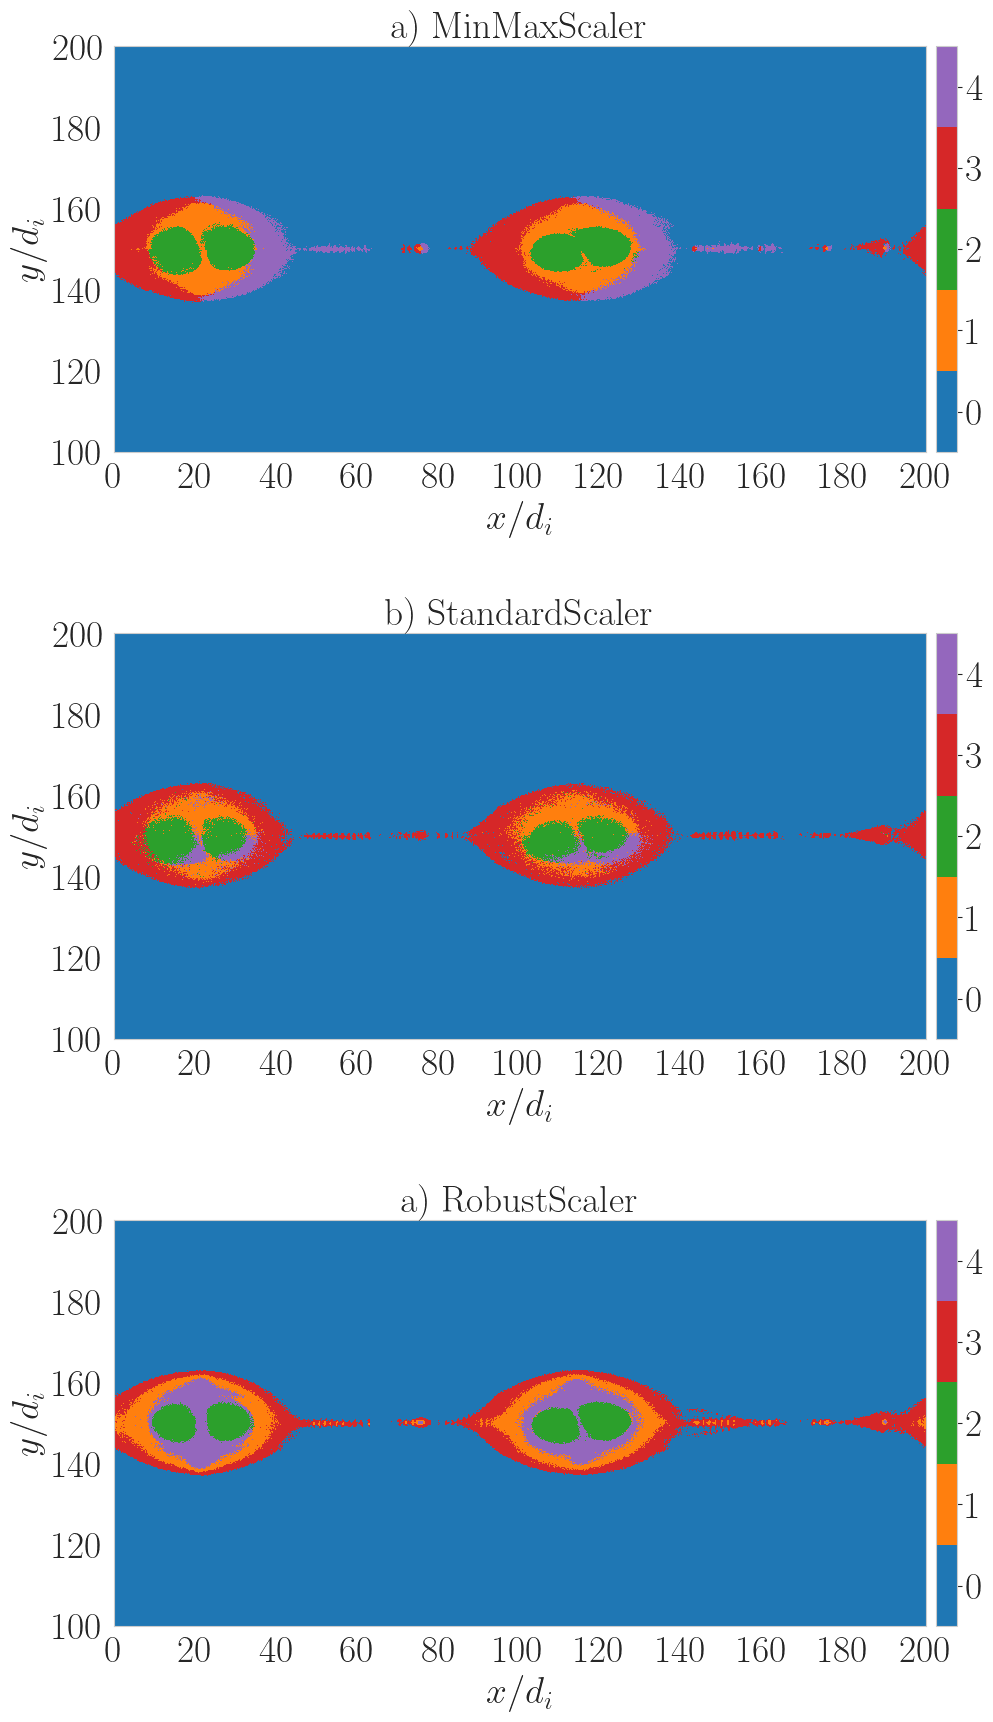

In [17]:
f, axs = plt.subplots(3,1, figsize=(fig_x_heat,3*fig_y_heat))

axs = axs.flatten()
f.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)

minmax_SOM.plot_2D_kmeans(axs[0], title = 'a) MinMaxScaler')
standard_SOM.plot_2D_kmeans(axs[1], title = 'b) StandardScaler')
robust_SOM.plot_2D_kmeans(axs[2], title = 'a) RobustScaler')


plt.savefig(savePath + 'scalers_simulationplane.pdf', bbox_inches='tight')

# Figure 5: Featuremaps

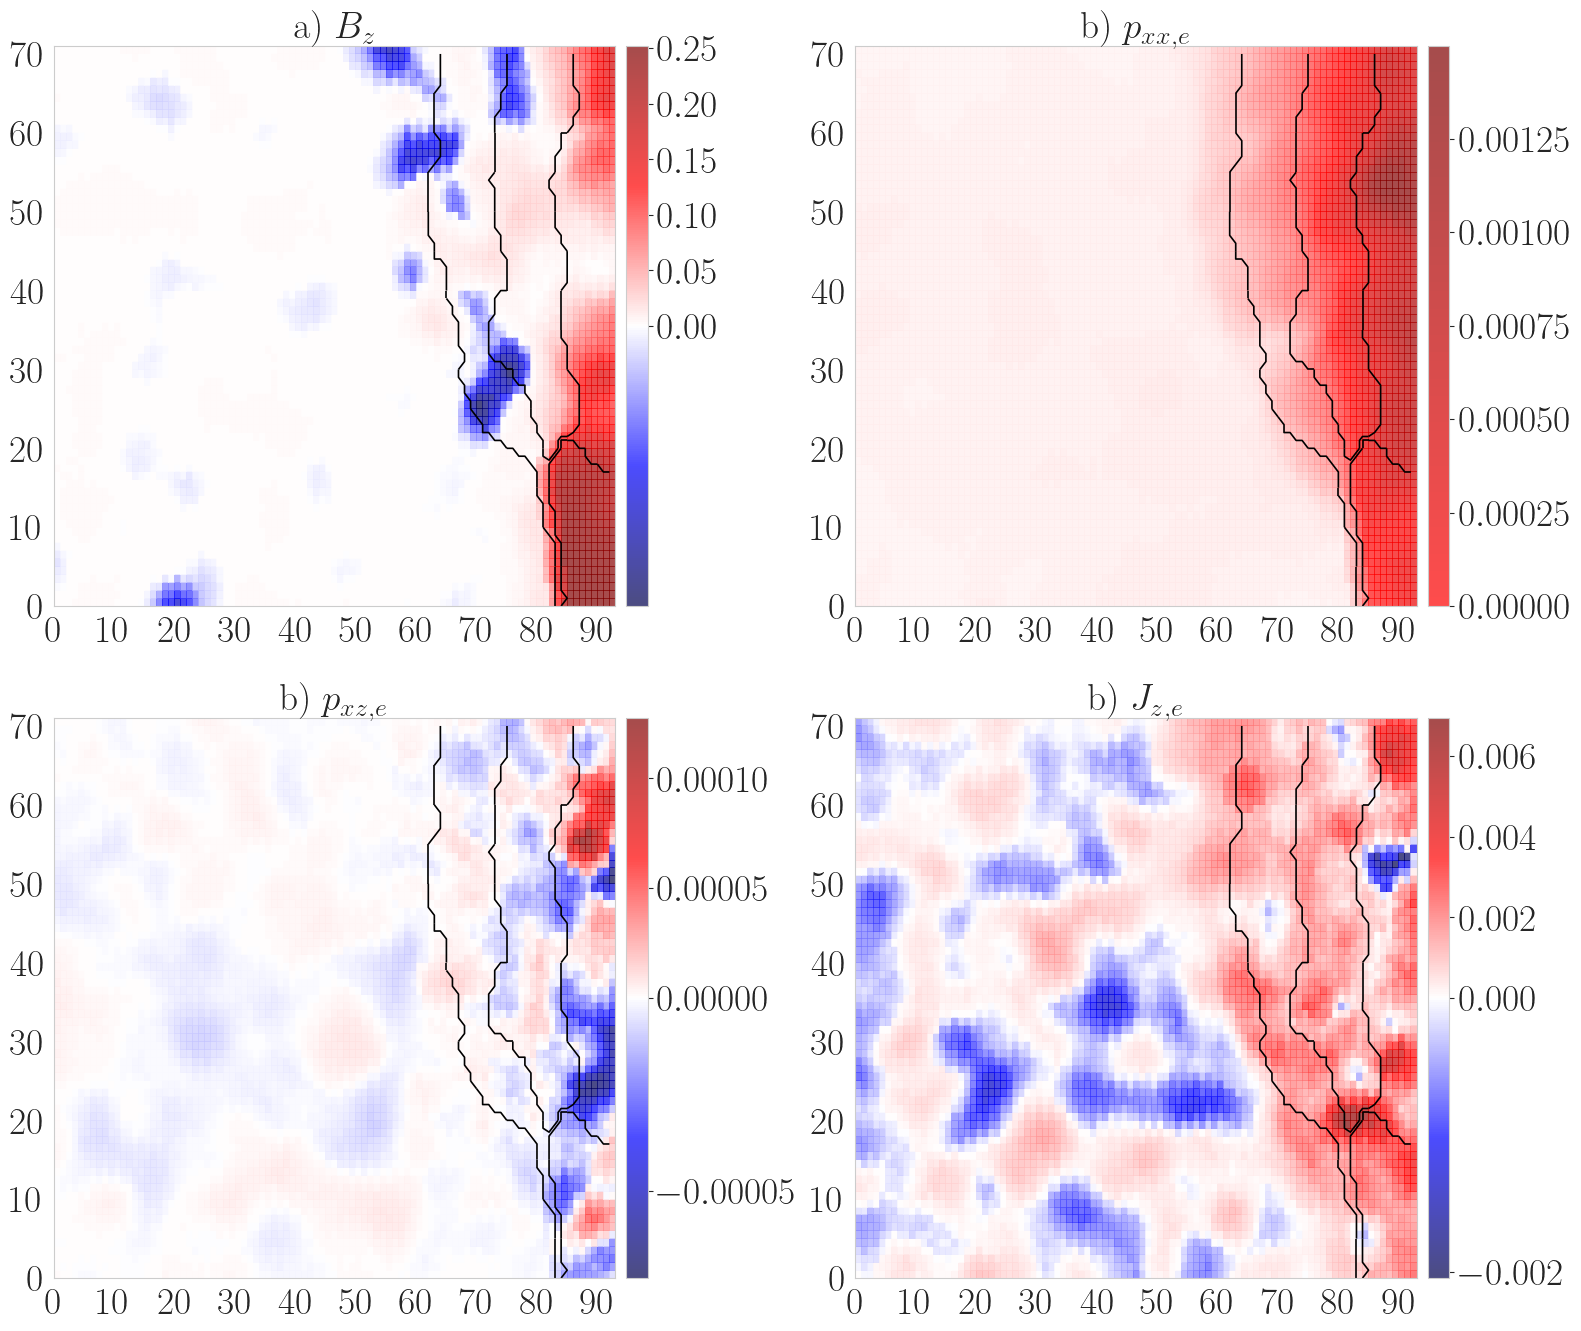

In [18]:
f, axs = plt.subplots(2,2, figsize=(2*fig_x_quad,2*fig_y_quad))
axs = axs.flatten()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.2)

robust_SOM.feature_map(axs[0], feature_key = 'Bz', contour = True, title = r'a) $B_z$')
robust_SOM.feature_map(axs[1], feature_key = 'pxx_elec', contour = True, title = r'b) $p_{xx,e}$')
robust_SOM.feature_map(axs[2], feature_key = 'pxz_elec', contour = True, title = r'b) $p_{xz,e}$')
robust_SOM.feature_map(axs[3], feature_key = 'Jz_elec', contour = True, title = r'b) $J_{z,e}$')

plt.savefig(savePath + 'feature_maps.pdf', dpi = 300)

# Figure 6: Handpicked Region Plasmoid merging region 1

In [19]:
with open(dataPath + 'handpicked_regions/handpicked_region_highJze_3.p', 'rb') as f:
    tpls_3 = pickle.load(f)

D:\Uni\SOM\SOM Project\unsupervised-classification\clusterSOM.py:112: UserWarning: Trying to register the cmap 'cluster' which already exists.
  mpl.cm.register_cmap(name='cluster', cmap=cmap6)


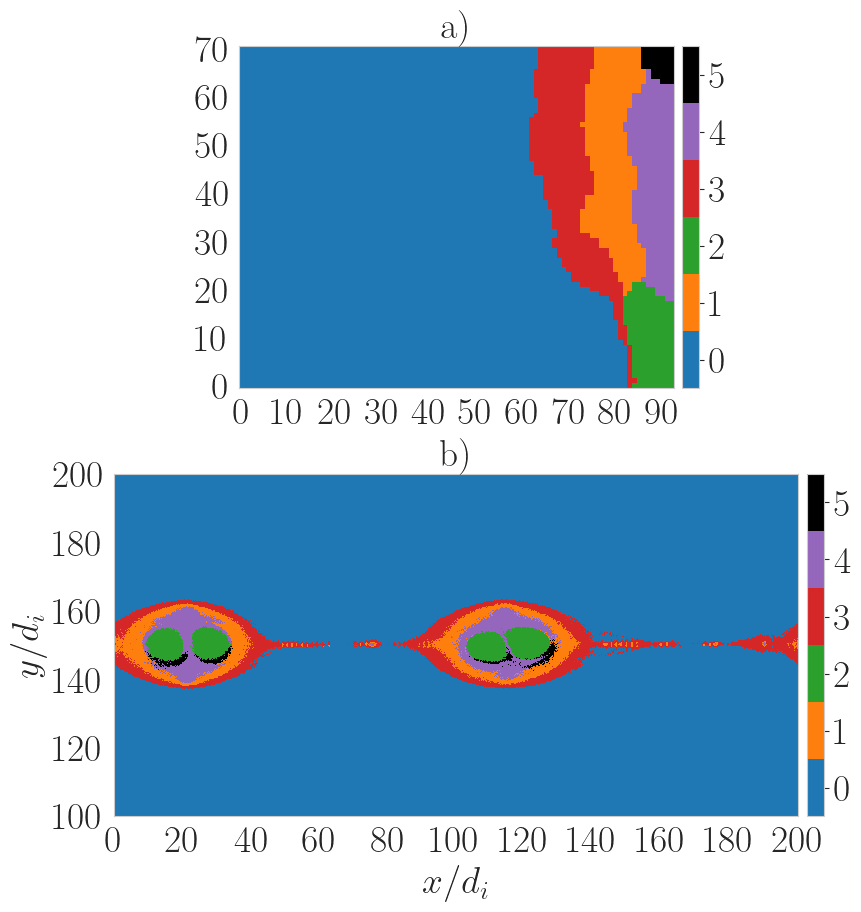

In [20]:
robust_SOM.plot_handpicked_region(tpls_3)
plt.savefig(savePath + 'handpicked_3_.pdf', bbox_inches = 'tight')

# Figure 7: Handpicked Region Plasmoid merging region 2

In [21]:
with open(dataPath + 'handpicked_regions/handpicked_region_lowJze_2.p', 'rb') as f:
    tpls_2 = pickle.load(f)

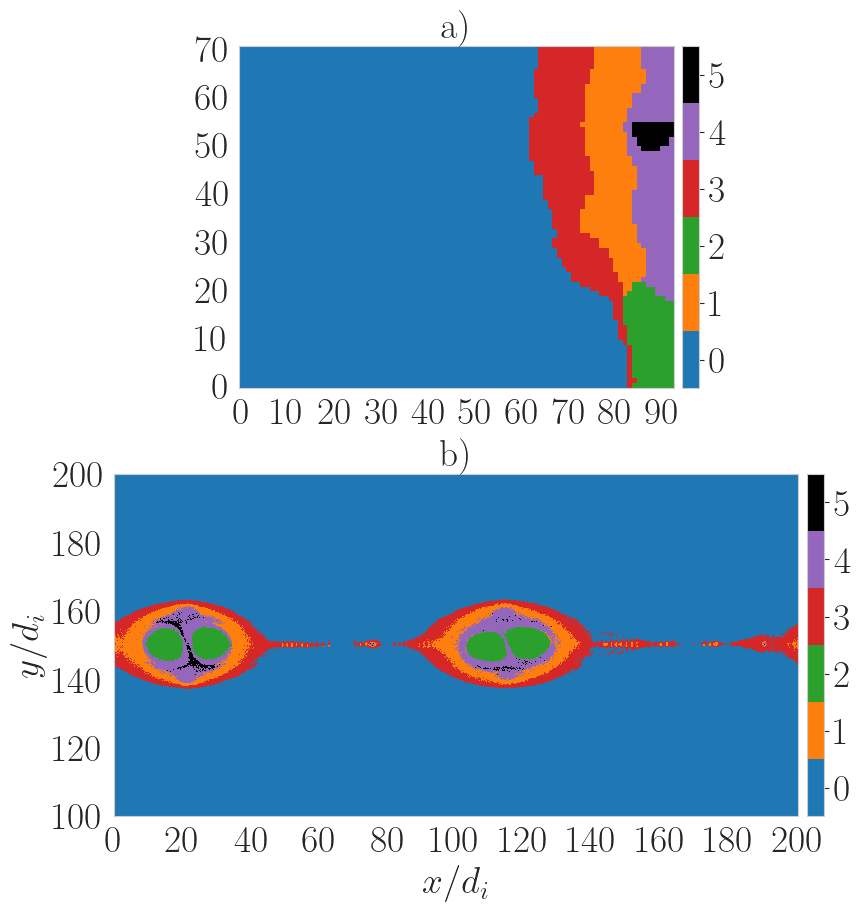

In [22]:
robust_SOM.plot_handpicked_region(tpls_2)
plt.savefig(savePath + 'handpicked_2_.pdf', bbox_inches = 'tight')

# Figure 8: Handpicked region high Jz, intersection of plasmoid clusters

In [23]:
with open(dataPath + 'handpicked_regions/handpicked_region_birdseye_1.p', 'rb') as f:
    tpls_1 = pickle.load(f)

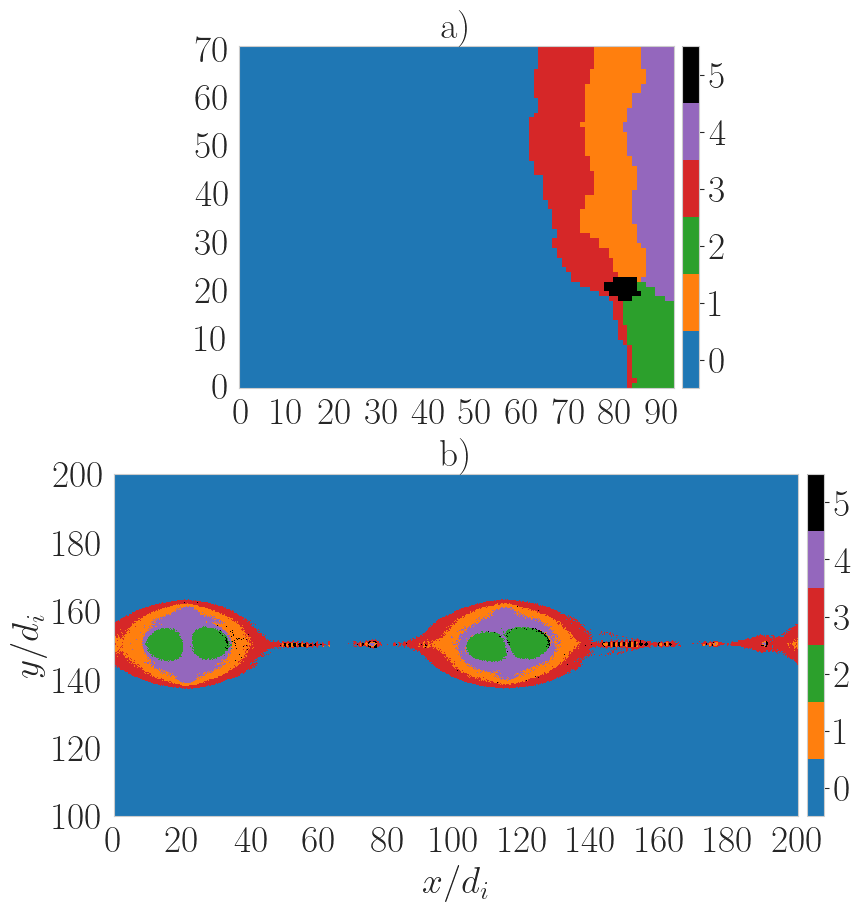

In [24]:
robust_SOM.plot_handpicked_region(tpls_1)
plt.savefig(savePath + 'handpicked_1_.pdf', bbox_inches = 'tight')

# Figure 9: Brazilian Plots

In [25]:
with open(dataPath + 'brazilian_data/tratio_dict.p', 'rb') as f:
    tratio = pickle.load(f)
    
with open(dataPath + 'brazilian_data/beta_dict.p', 'rb') as f:
    beta = pickle.load(f)

C:\Users\koehn\anaconda3\lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
C:\Users\koehn\anaconda3\lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


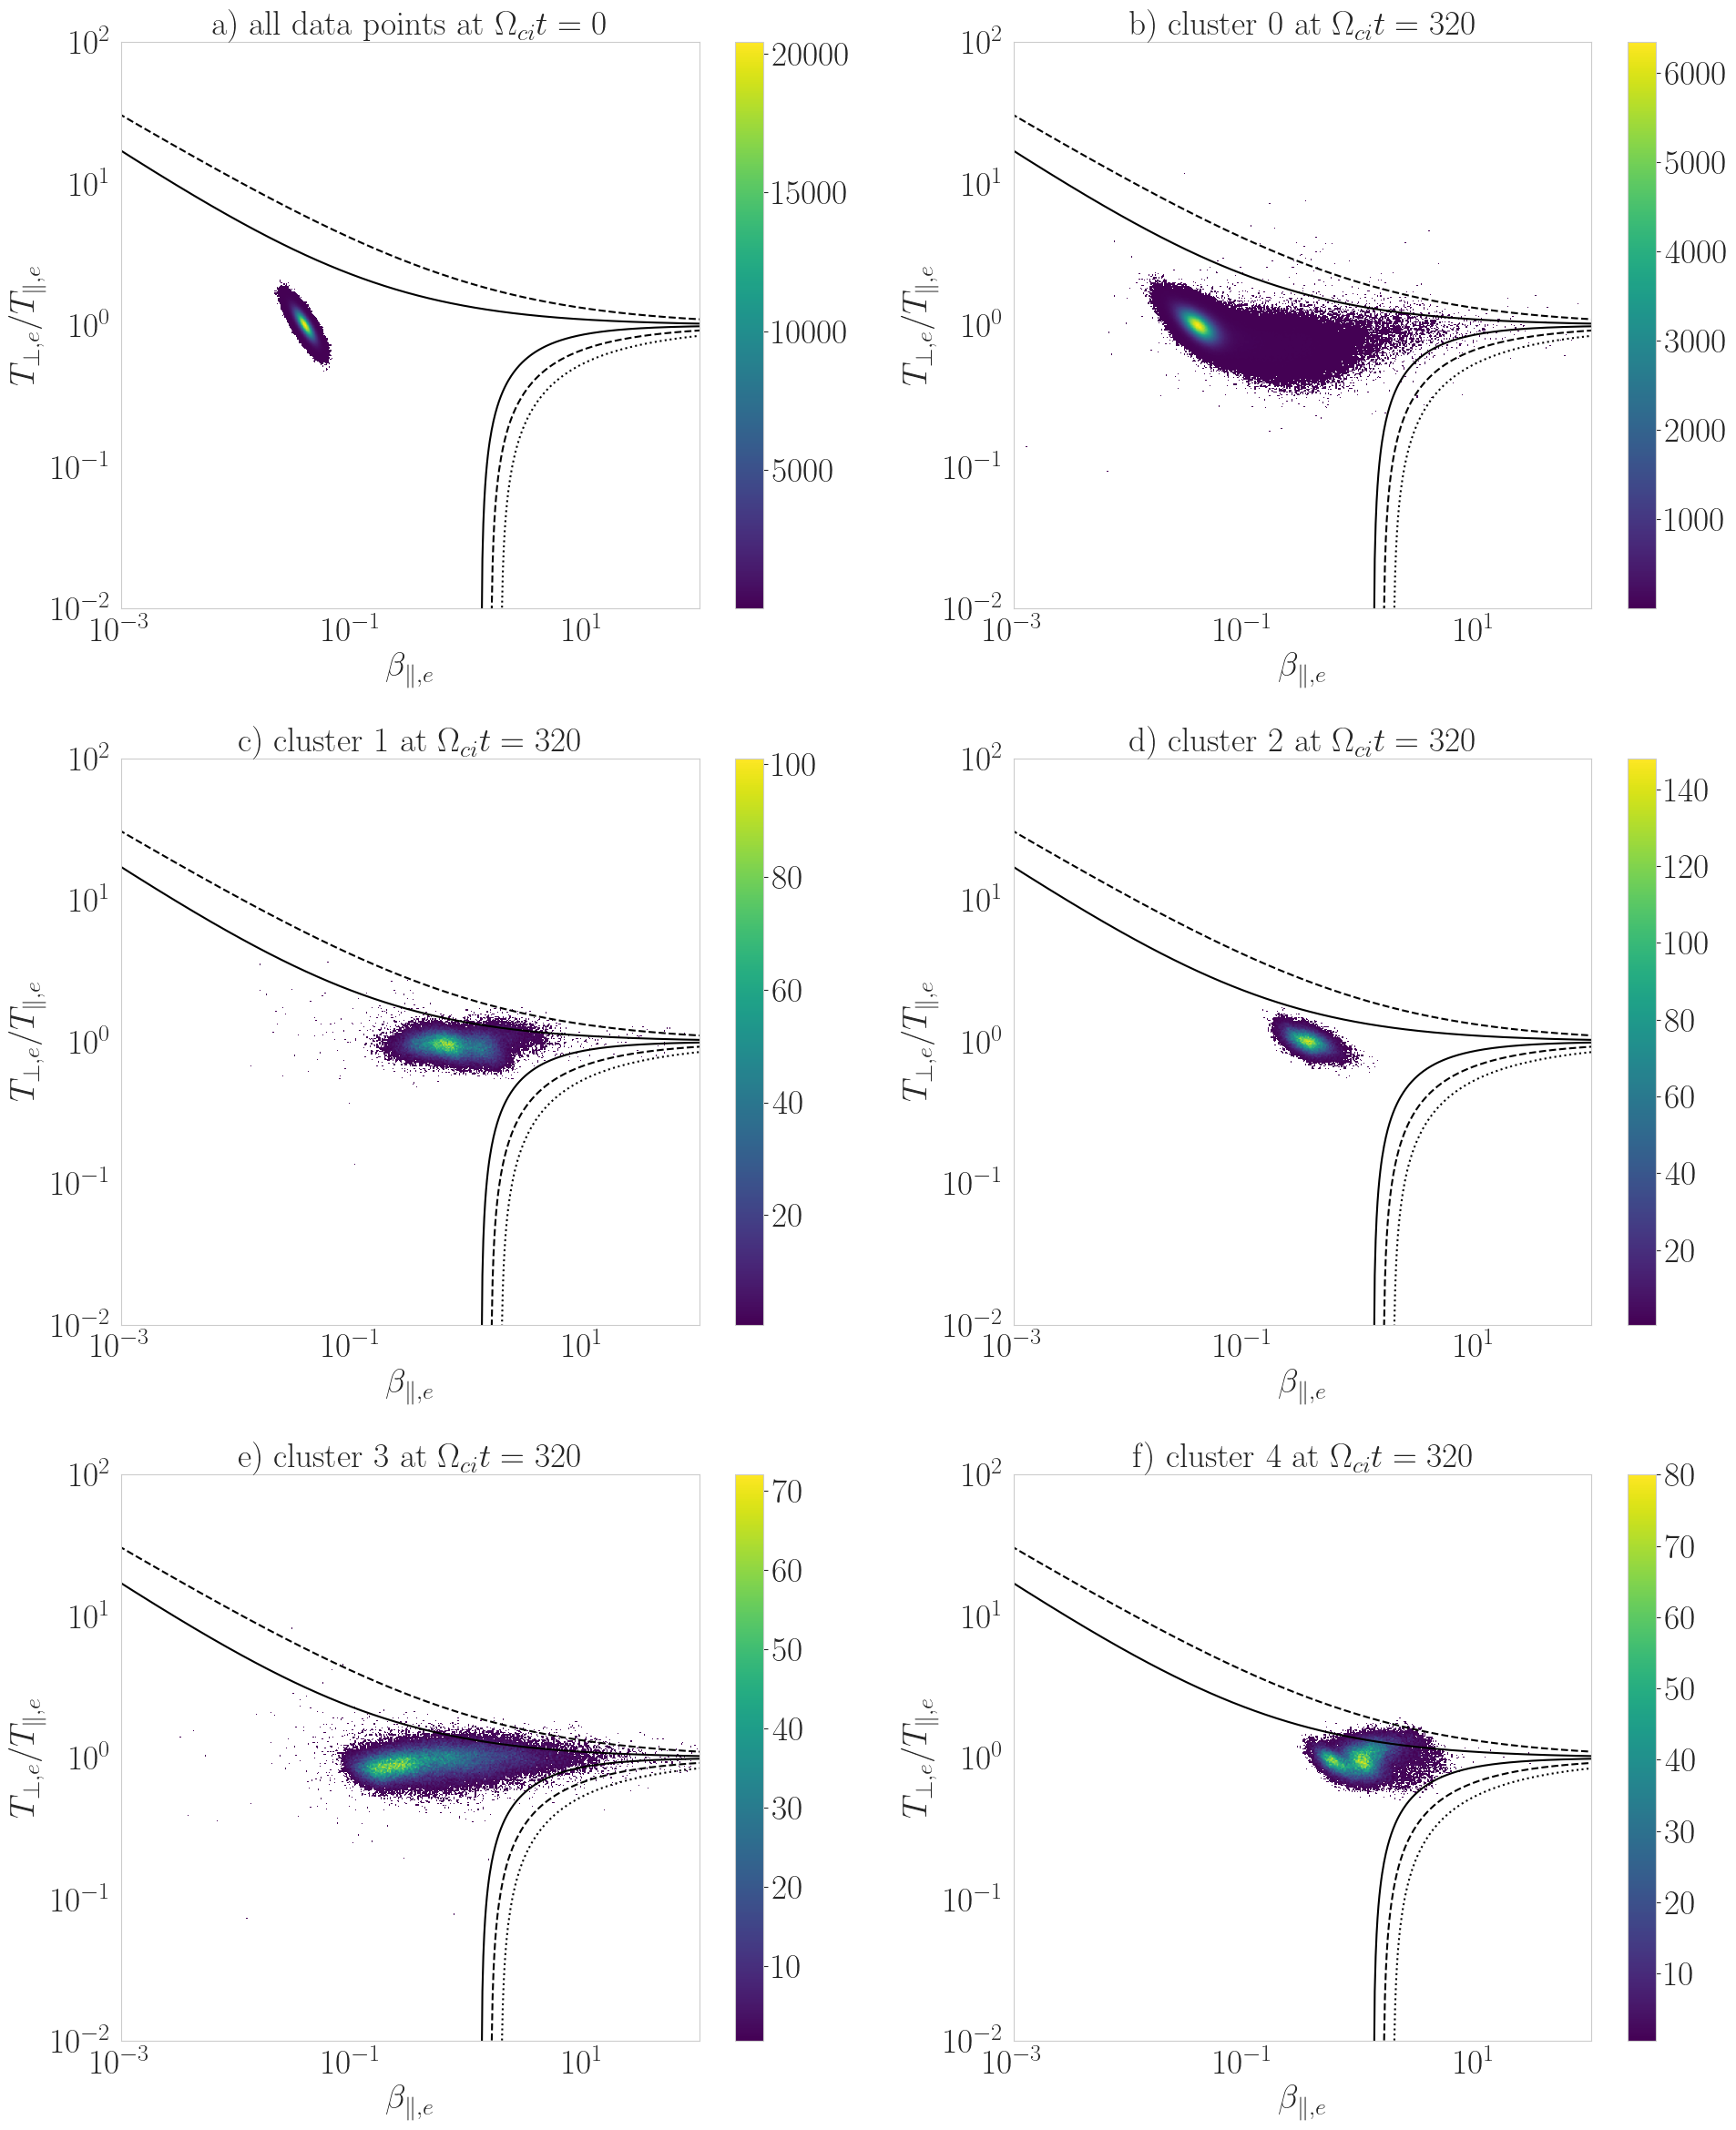

In [26]:
fig = plt.figure(figsize = (2*fig_x_quad+2,3*fig_y_quad))

pos = (3,2,1)
ax1 = stability_thresh_density(fig, pos, beta['cyc0'], tratio['cyc0'], cluster_num = None, label = 'a) all data points at $\Omega_{ci}t= 0$')

pos = (3,2,2)
ax2 = stability_thresh_density(fig, pos,  beta['cyc2000_0'], tratio['cyc2000_0'], cluster_num = 0,  label = 'b) cluster 0 at $\Omega_{ci}t= 320$')

pos = (3,2,3)
ax1 = stability_thresh_density(fig, pos, beta['cyc2000_1'], tratio['cyc2000_1'], cluster_num = 1,  label = 'c) cluster 1 at $\Omega_{ci}t= 320$')

pos = (3,2,4)
ax2 = stability_thresh_density(fig, pos,  beta['cyc2000_2'], tratio['cyc2000_2'], cluster_num = 2,  label = 'd) cluster 2 at $\Omega_{ci}t= 320$')

pos = (3,2,5)
ax1 = stability_thresh_density(fig, pos,  beta['cyc2000_3'], tratio['cyc2000_3'], cluster_num = 3,  label = 'e) cluster 3 at $\Omega_{ci}t= 320$')

pos = (3,2,6)
ax2 = stability_thresh_density(fig, pos,  beta['cyc2000_4'], tratio['cyc2000_4'], cluster_num = 4,  label = 'f) cluster 4 at $\Omega_{ci}t= 320$')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.28)
fig.tight_layout()

plt.savefig(savePath + 'all_brazil_densities_scatter_density_.pdf', bbox_inches = 'tight')

# Appendix

# A1

In [27]:
init_dir_10sqrtN = dataPath + 'robust_n5_sigma20_eta05_101x132'
bestmatch_SOM = clusterSOM(init_dir_10sqrtN)

In [28]:
init_dir_epoch7 = dataPath + 'robust_n7_sigma20_eta05_71x93'
worstmatch_SOM = clusterSOM(init_dir_epoch7)

In [29]:
R_best, matches_best, counts_best = robust_SOM.SOM_matching(bestmatch_SOM)


finding matches for cluster number  1.0
finding matches for cluster number  2.0
finding matches for cluster number  3.0
finding matches for cluster number  4.0
R =  0.95


In [30]:
R_worst, matches_worst, counts_worst = robust_SOM.SOM_matching(worstmatch_SOM)


finding matches for cluster number  1.0
finding matches for cluster number  2.0
finding matches for cluster number  3.0
finding matches for cluster number  4.0
R =  0.88


D:\Uni\SOM\SOM Project\unsupervised-classification\clusterSOM.py:85: UserWarning: Trying to register the cmap 'cluster' which already exists.
  mpl.cm.register_cmap(name='cluster', cmap=cmap)


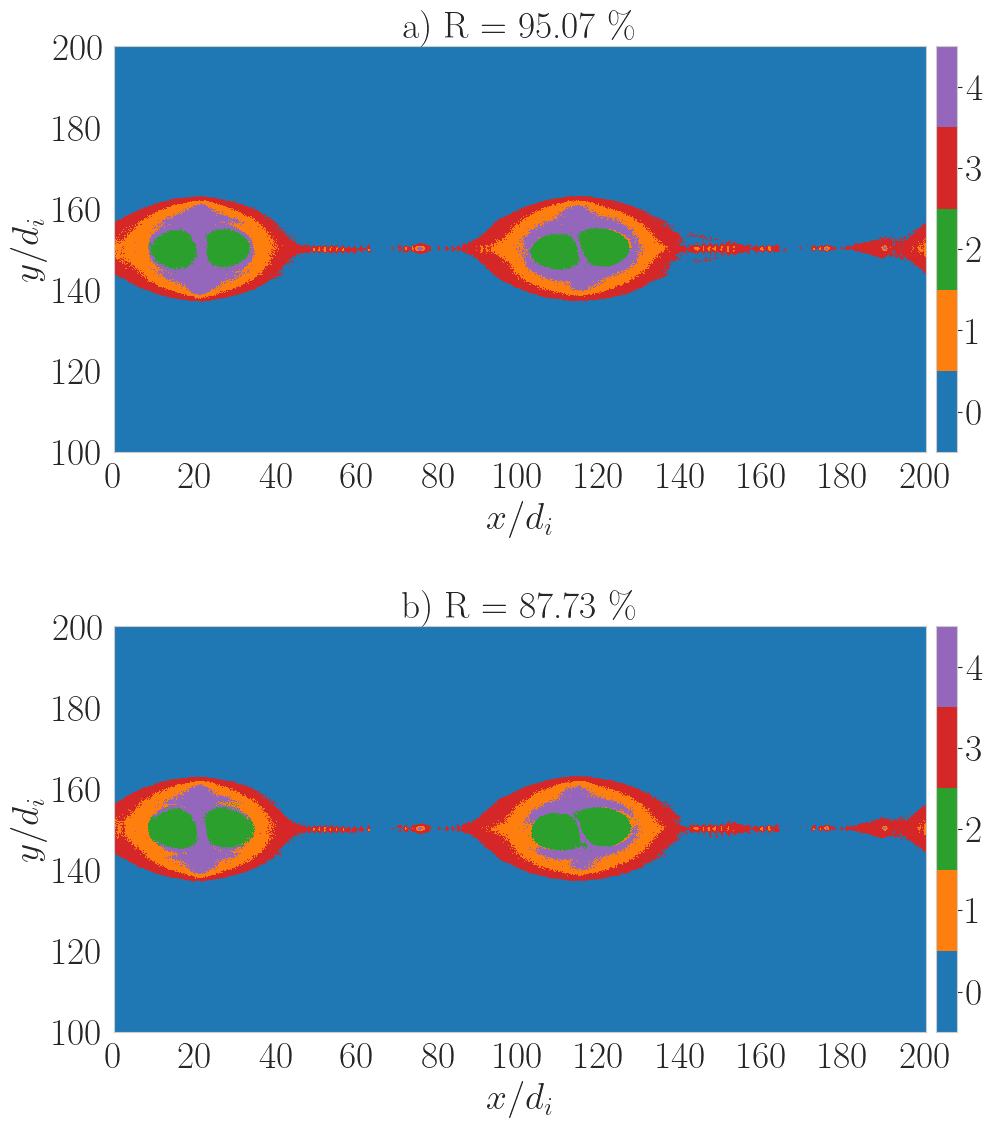

In [31]:
f, axs = plt.subplots(2,1, figsize=(fig_x_heat,2*fig_y_heat))
axs = axs.flatten()
f.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)

bestmatch_SOM.plot_2D_kmeans(axs[0],'a) R = '+ str(round(R_best*100,2))+' \%')
worstmatch_SOM.plot_2D_kmeans(axs[1],'b) R = '+ str(round(R_worst*100,2))+ ' \%')

plt.savefig(savePath + 'best_worst_matchingR.pdf', bbox_inches='tight')

# A2

In [32]:
cyc1000_SOM = clusterSOM(dataPath + 'robust_n5_sigma20_eta05_71x93_matchcyc1000')

In [33]:
with open(dataPath + 'data_cyc1000/raw_data_cyc1000.p', 'rb') as f:
    cyc1000_raw = pickle.load(f)
Jz1000_uc = slicedata(np.reshape(cyc1000_raw[:,10], (2128,2128)), ymin = 100)

with open(dataPath + 'data_cyc1000/field_lines_cyc1000.p', 'rb') as f:
    f_1000 = pickle.load(f)

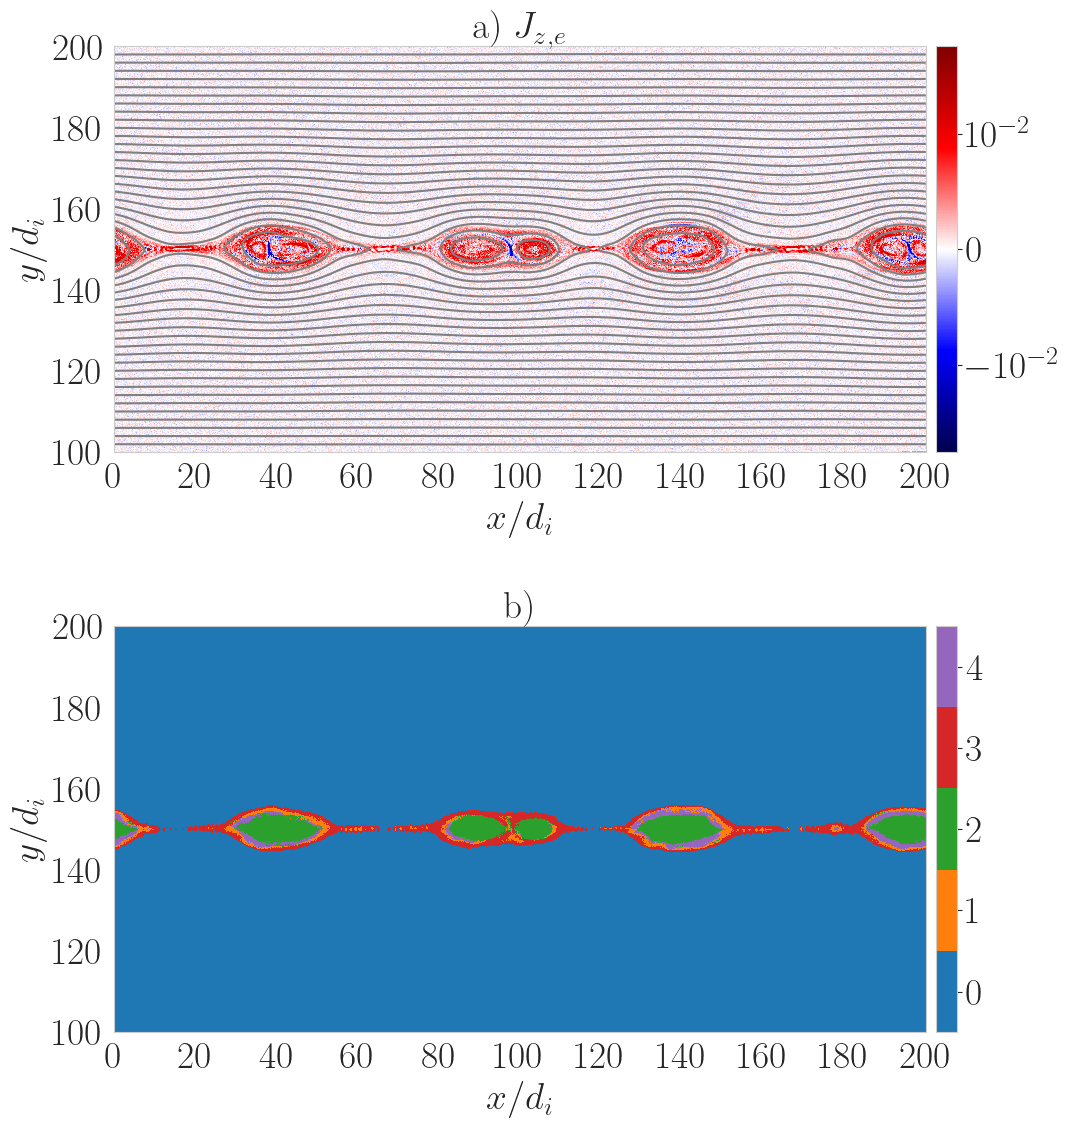

In [34]:
f, axs = plt.subplots(2,1, figsize=(fig_x_heat,2*fig_y_heat))
axs = axs.flatten()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.1)
f.tight_layout()


vmin, vmax, vcenter = get_normvals(Jz1000_uc)
ax = heatmap2d(axs[0], np.reshape(Jz1000_uc,(1064,2128)), 'a)  $J_{z,e}$',ymin = 100, colmap = 'seismic', filename = 'Jzelec_upper', dir = 'Results', norm = SymLogNorm(linthresh=0.01, vmin=-0.07, vmax=0.07), f=f_1000)
cyc1000_SOM.plot_2D_kmeans(axs[1],'b)')
plt.savefig(savePath + 'match_timestep1000_robustness_fieldJz.pdf', bbox_inches = 'tight')